# 1. Project Overview

**Objective:**

Analyze the impact of smoking on various health metrics by comparing smokers and non-smokers. Key health indicators include cholesterol, heart rate, blood pressure (systolic and diastolic), and cigarette consumption per day.

**Key Questions:**

- How do cholesterol, heart rate, and blood pressure differ between smokers and non-smokers?

- Is there a correlation between cigarettes per day and health metrics (cholesterol, blood pressure)?

- What trends or patterns can be observed in the distribution of these health metrics?

- Which is the heaviest-smoking group by age?



### 2. Data Loading & Inspection

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # optional for further statistical analysis

In [71]:
# loading dataset
df_health = pd.read_csv("smoking_health_data_final.csv", sep = ",")

# checking the fisrt 5 rows
df_health.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [72]:
# Dataset dimensions

print(df_health.shape)

# Data types and missing values
df_health.info()

# Quick summary statistics
df_health.describe()

(3900, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


From the .info() method it appears that in columns "cigs_per day" and "chol" there are nulls values.

### 3. Data Cleaning & Preprocessing

In [73]:
# verifying for missing values

df_health.isna().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [74]:
# To keep a certain data accuraccy I am going to rename it as "unknown" value for the "cigs_per day" and "chol" columns.

df_health["cigs_per_day"].fillna("0",inplace = True)

C:\Users\james\AppData\Local\Temp\ipykernel_11188\1674628083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_health["cigs_per_day"].fillna("0",inplace = True)
C:\Users\james\AppData\Local\Temp\ipykernel_11188\1674628083.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_health["cigs_per_day"].fillna("0",inplace = True)


In [78]:
df_health["chol"].fillna("0", inplace = True)

C:\Users\james\AppData\Local\Temp\ipykernel_11188\3447188489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_health["chol"].fillna("0", inplace = True)
C:\Users\james\AppData\Local\Temp\ipykernel_11188\3447188489.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_health["chol"].fillna("0", inplace = True)


In [79]:
df_health.head(10)

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,0,219.0
1,45,male,yes,64,121/72,0,248.0
2,58,male,yes,81,127.5/76,0,235.0
3,42,male,yes,90,122.5/80,0,225.0
4,42,male,yes,62,119/80,0,226.0
5,57,male,yes,62,107.5/72.5,0,223.0
6,43,male,yes,75,109.5/69,0,222.0
7,42,male,yes,66,123/73,0,196.0
8,37,male,yes,65,123.5/77,0,188.0
9,49,male,yes,93,127.5/81.5,0,256.0


In [80]:
# checking if nulls are still present

df_health.isna().sum()

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              0
dtype: int64

In [81]:
# Splitting "blood_pressure" column into two new ones for a better reading as "systolic" and "diastolic"

df_health[['blood_pressure.systolic (mmHg)', 'blood_pressure.diastolic (mmHg)']] = df_health['blood_pressure'].str.split('/', expand=True)

In [42]:
# checking if the columns have been added correctly

df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   age                              3900 non-null   int64 
 1   sex                              3900 non-null   object
 2   current_smoker                   3900 non-null   object
 3   heart_rate                       3900 non-null   int64 
 4   blood_pressure                   3900 non-null   object
 5   cigs_per_day                     3900 non-null   object
 6   chol                             3900 non-null   object
 7   blood_pressure.systolic (mmHg)   3900 non-null   object
 8   blood_pressure.diastolic (mmHg)  3900 non-null   object
dtypes: int64(2), object(7)
memory usage: 274.3+ KB


In [82]:
# Convert values to float
df_health['blood_pressure.systolic (mmHg)'] = df_health['blood_pressure.systolic (mmHg)'].astype(float)
df_health['blood_pressure.diastolic (mmHg)'] = df_health['blood_pressure.diastolic (mmHg)'].astype(float)

# Display the modified DataFrame
print(df_health)


      age   sex current_smoker  heart_rate blood_pressure cigs_per_day   chol  \
0      54  male            yes          95         110/72            0  219.0   
1      45  male            yes          64         121/72            0  248.0   
2      58  male            yes          81       127.5/76            0  235.0   
3      42  male            yes          90       122.5/80            0  225.0   
4      42  male            yes          62         119/80            0  226.0   
...   ...   ...            ...         ...            ...          ...    ...   
3895   37  male            yes          88     122.5/82.5         60.0  254.0   
3896   49  male            yes          70         123/75         60.0  213.0   
3897   56  male            yes          70         125/79         60.0  246.0   
3898   50  male            yes          85         134/95         60.0  340.0   
3899   40  male            yes          98         132/86         70.0  210.0   

      blood_pressure.systol

In [83]:
# Convert other columns

df_health['age'] = pd.to_numeric(df_health['age'], errors='coerce').astype(int)
df_health['heart_rate'] = pd.to_numeric(df_health['heart_rate'], errors='coerce').astype(int)
df_health['cigs_per_day'] = pd.to_numeric(df_health['cigs_per_day'], errors='coerce').astype(int)
df_health['chol'] = pd.to_numeric(df_health['chol'], errors='coerce').astype(float)


In [84]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              3900 non-null   int32  
 1   sex                              3900 non-null   object 
 2   current_smoker                   3900 non-null   object 
 3   heart_rate                       3900 non-null   int32  
 4   blood_pressure                   3900 non-null   object 
 5   cigs_per_day                     3900 non-null   int32  
 6   chol                             3900 non-null   float64
 7   blood_pressure.systolic (mmHg)   3900 non-null   float64
 8   blood_pressure.diastolic (mmHg)  3900 non-null   float64
dtypes: float64(3), int32(3), object(3)
memory usage: 228.6+ KB


In [85]:
# using drop method to delete "blood_pressure" from the dataset

df_health = df_health.drop(columns=["blood_pressure"], axis = 1)

In [86]:
# verifying if the "blood_pressure" columns has been deleted 

df_health.describe()

,age,heart_rate,cigs_per_day,chol,blood_pressure.systolic (mmHg),blood_pressure.diastolic (mmHg)
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,49.537949,75.688974,9.135641,236.171282,132.395385,82.987179
std,8.559275,12.015376,12.028875,45.452786,21.976335,11.918623
min,32.000000,44.000000,0.000000,0.000000,83.500000,48.000000
25%,42.000000,68.000000,0.000000,205.000000,117.000000,75.000000
50%,49.000000,75.000000,0.000000,234.000000,128.000000,82.000000
75%,56.000000,82.000000,20.000000,263.000000,144.000000,90.000000
max,70.000000,143.000000,70.000000,696.000000,295.000000,142.500000


In [87]:
# rename "chol" and "heart_rate"

df_health = df_health.rename(columns={"chol":"cholesterol ( mg/dL)"})

In [88]:
df_health = df_health.rename(columns={"heart_rate": "heart_rate (BPM)"})

In [89]:
# checking the entire dataset before analysis.

df_health

,age,sex,current_smoker,heart_rate (BPM),cigs_per_day,cholesterol ( mg/dL),blood_pressure.systolic (mmHg),blood_pressure.diastolic (mmHg)
0,54,male,yes,95,0,219.0,110.0,72.0
1,45,male,yes,64,0,248.0,121.0,72.0
2,58,male,yes,81,0,235.0,127.5,76.0
3,42,male,yes,90,0,225.0,122.5,80.0
4,42,male,yes,62,0,226.0,119.0,80.0
...,...,...,...,...,...,...,...,...
3895,37,male,yes,88,60,254.0,122.5,82.5
3896,49,male,yes,70,60,213.0,123.0,75.0
3897,56,male,yes,70,60,246.0,125.0,79.0
3898,50,male,yes,85,60,340.0,134.0,95.0


### 5 Descriptive Statistics

In [90]:
# Basic descriptive stats for numeric columns.

numeric_cols = ['age', 'heart_rate (BPM)', 'blood_pressure.systolic (mmHg)', 'blood_pressure.diastolic (mmHg)', 'cigs_per_day', 'cholesterol ( mg/dL)']
print(df_health[numeric_cols].describe())

               age  heart_rate (BPM)  blood_pressure.systolic (mmHg)  \
count  3900.000000       3900.000000                     3900.000000   
mean     49.537949         75.688974                      132.395385   
std       8.559275         12.015376                       21.976335   
min      32.000000         44.000000                       83.500000   
25%      42.000000         68.000000                      117.000000   
50%      49.000000         75.000000                      128.000000   
75%      56.000000         82.000000                      144.000000   
max      70.000000        143.000000                      295.000000   

       blood_pressure.diastolic (mmHg)  cigs_per_day  cholesterol ( mg/dL)  
count                      3900.000000   3900.000000           3900.000000  
mean                         82.987179      9.135641            236.171282  
std                          11.918623     12.028875             45.452786  
min                          48.000000     

In [98]:
print(df_health.groupby('current_smoker')[numeric_cols].describe().T)


current_smoker                                  no          yes
age                             count  1968.000000  1932.000000
                                mean     51.381098    47.660455
                                std       8.716112     7.971832
                                min      33.000000    32.000000
                                25%      44.000000    41.000000
                                50%      52.000000    46.000000
                                75%      59.000000    53.000000
                                max      70.000000    69.000000
heart_rate (BPM)                count  1968.000000  1932.000000
                                mean     75.007622    76.383023
                                std      12.224324    11.761363
                                min      44.000000    45.000000
                                25%      67.000000    68.000000
                                50%      75.000000    75.000000
                                75%     

Smokers have a slightly higher average heart rate. It’s not a huge difference, but consistent across percentiles.
Surprisingly, non-smokers have slightly higher systolic blood pressure on average — this might require further investigation. 
Maybe other factors (age, medication, BMI) influence it.
Again, non-smokers show slightly higher average diastolic pressure. A bit unexpected.
Cholesterol levels are similar, but slightly higher for non-smokers, which might be due to age, diet, or other factors.
Smokers tend to be younger, which could explain why their blood pressure and cholesterol appear slightly better.

More analysis would help clarify whether age or smoking is driving these differences

In [92]:
# checking if there is any correlation between these numeric values.

df_health[['age','cigs_per_day', 'cholesterol ( mg/dL)', 'blood_pressure.diastolic (mmHg)', 'blood_pressure.systolic (mmHg)', 'heart_rate (BPM)']].corr()

,age,cigs_per_day,cholesterol ( mg/dL),blood_pressure.diastolic (mmHg),blood_pressure.systolic (mmHg),heart_rate (BPM)
age,1.000000,-0.191442,0.247124,0.198784,0.383836,-0.012702
cigs_per_day,-0.191442,1.000000,-0.028254,-0.051754,-0.087255,0.072258
cholesterol ( mg/dL),0.247124,-0.028254,1.000000,0.158374,0.204249,0.094579
blood_pressure.diastolic (mmHg),0.198784,-0.051754,0.158374,1.000000,0.784655,0.175785
blood_pressure.systolic (mmHg),0.383836,-0.087255,0.204249,0.784655,1.000000,0.179265
heart_rate (BPM),-0.012702,0.072258,0.094579,0.175785,0.179265,1.000000


There’s no strong correlation between cigarettes per day and these health metrics in a linear sense.
This doesn't mean there's no health impact, just that the linear relationship isn't strong here.

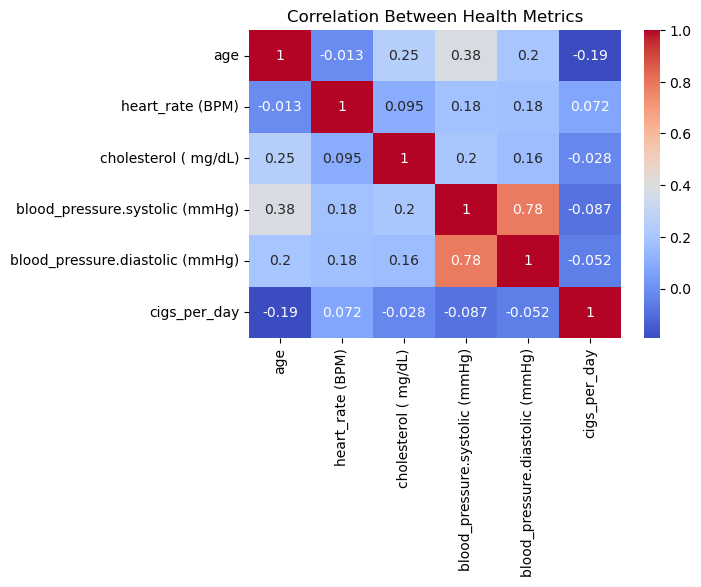

In [96]:
# visualize the correlation with a heatmap

health_cols = ['age','heart_rate (BPM)', 'cholesterol ( mg/dL)', 'blood_pressure.systolic (mmHg)', 'blood_pressure.diastolic (mmHg)']

plt.figure(figsize=(6, 4))
sns.heatmap(df_health[health_cols + ['cigs_per_day']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Health Metrics")
plt.show()

In [95]:
# analyse the age range of heavy smokers

df_health.groupby("age")["cigs_per_day"].sum().sort_values(ascending=False).head(5)

age
40    2175
46    1958
43    1949
42    1935
44    1783
Name: cigs_per_day, dtype: int32

### 6. Insights & Findings

As expected, systolic and diastolic blood pressures show a strong positive correlation (r = 0.78). Other relationships, such as between cigarettes per day and cholesterol (r = -0.03) or blood pressure (r ≈ -0.05 to -0.09), are very weak. These results suggest that smoking quantity is not linearly associated with these metrics in this dataset and may require non-linear or long-term analysis to detect its full impact. The age range of 40 to 46 is associated with the people who smoke the most all sexes included.

In [101]:
# exporting the cleaned file version in "csv" format.

df_health.to_csv("Health_Impact_of_Smoking.csv", sep =";")